# BUMP
Analyse results of barotropic flow over a bump mitgcm simulation

In [1]:
# %load /Users/gunnar/Projects/python/standard_imports.py
%matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import xarray as xr
import gsw
import cmocean

# import own modules (install from https://github.com/gunnarvoet/pythonlib))
import gvpy.gvimport as gvi
import gvpy.figure as gvf
import gvpy.misc as gv
import gvpy.ocean as gvo
import spfunctions.spfunctions as spf

# Automatically reload modules. Use this for modules that will be modified while
# editing this notebook.
# Option 1 means only reload modules given in aimport.
# Option 2 means reload all except for those in aimport
# Running %aimport by itself will show what it is doing.
%reload_ext autoreload
%autoreload 1
%aimport spfunctions
%aimport gvpy
%aimport gvpy.misc
%aimport gvpy.ocean
%aimport gvpy.figure
%aimport gvpy.gvimport

import warnings
warnings.filterwarnings('ignore')

## Read model data
Start out with B5 and B6. B5 is hydrostatic, B6 is non-hydrostatic.

In [4]:
# DataDir = '/Volumes/svalbard/mitgcm/bump/B6/run/allmnc/'
DataDir = '/Users/gunnar/Projects/model/bump_data/B6/allmnc/'


b6 = xr.open_dataset(DataDir+'diag1.glob.nc')
b6s = xr.open_dataset(DataDir+'state.glob.nc')
grid = xr.open_dataset(DataDir+'grid.glob.nc')


# DataDir = '/Volumes/svalbard/mitgcm/bump/B5/run/allmnc/'
# b5 = xr.open_dataset(DataDir+'diag1.glob.nc')
# b5s = xr.open_dataset(DataDir+'state.glob.nc')


In [5]:
grid

<xarray.Dataset>
Dimensions:  (X: 1, Xp1: 2, Y: 2000, Yp1: 2001, Z: 100, Zl: 100, Zp1: 101, Zu: 100)
Coordinates:
  * Z        (Z) float64 -31.48 -93.92 -155.3 -215.6 -274.9 -333.2 -390.4 ...
  * Zp1      (Zp1) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
  * Zu       (Zu) float64 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 -418.7 ...
  * Zl       (Zl) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
  * X        (X) float64 2.5e+03
  * Y        (Y) float64 500.0 1.499e+03 2.496e+03 3.491e+03 4.485e+03 ...
  * Xp1      (Xp1) float64 0.0 5e+03
  * Yp1      (Yp1) float64 0.0 1e+03 1.998e+03 2.994e+03 3.989e+03 4.981e+03 ...
Data variables:
    RC       (Z) float64 -31.48 -93.92 -155.3 -215.6 -274.9 -333.2 -390.4 ...
    RF       (Zp1) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
    RU       (Zu) float64 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 -418.7 ...
    RL       (Zl) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
    drC      (Zp1) float

In [6]:
# center of domain in km
my = grid.Y.mean()/1000
print(my)

<xarray.DataArray 'Y' ()>
array(287.4999999999997)


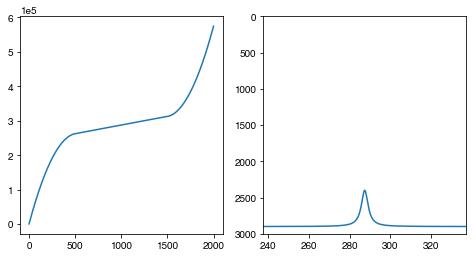

In [9]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].plot(np.arange(0,2000), b6.Y.values)
ax[1].set(ylim=(3000,0), xlim=(my-50,my+50))
# [ax[1].axhline(y=yy, linewidth=0.1, alpha=0.2) for yy in -grid.Z];
# [ax[1].axvline(x=xx, linewidth=0.1, alpha=0.2) for xx in grid.Y/1000];
ax[1].plot(grid.Y/1000,grid.Depth);

## Generate subset of B5 and B6

In [10]:
b6

<xarray.Dataset>
Dimensions:      (T: 154, X: 1, Xp1: 2, Y: 2000, Yp1: 2001, Zld000100: 100, Zmd000100: 100)
Coordinates:
  * Xp1          (Xp1) float64 0.0 5e+03
  * Y            (Y) float64 500.0 1.499e+03 2.496e+03 3.491e+03 4.485e+03 ...
  * X            (X) float64 2.5e+03
  * Yp1          (Yp1) float64 0.0 1e+03 1.998e+03 2.994e+03 3.989e+03 ...
  * T            (T) float64 450.0 1.35e+03 2.25e+03 3.15e+03 4.05e+03 ...
  * Zmd000100    (Zmd000100) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
  * Zld000100    (Zld000100) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 ...
Data variables:
    diag_levels  (Zmd000100) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 ...
    iter         (T) int32 90 270 450 630 810 990 1170 1350 1530 1710 1890 ...
    UVEL         (T, Zmd000100, Y, Xp1) float64 0.0 0.0 2.598e-08 2.598e-08 ...
    VVEL         (T, Zmd000100, Yp1, X) float64 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
    THETA        (T, Zmd000100, Y, X) float64 3.0 3.0 3.0 3.0 3.0 3.0 3.0 ...
 

In [59]:
b6s

<xarray.Dataset>
Dimensions:  (T: 155, X: 1, Xp1: 2, Y: 2000, Yp1: 2001, Z: 100, Zl: 100)
Coordinates:
  * Xp1      (Xp1) float64 0.0 5e+03
  * Y        (Y) float64 500.0 1.499e+03 2.496e+03 3.491e+03 4.485e+03 ...
  * Z        (Z) float64 -31.48 -93.92 -155.3 -215.6 -274.9 -333.2 -390.4 ...
  * X        (X) float64 2.5e+03
  * Yp1      (Yp1) float64 0.0 1e+03 1.998e+03 2.994e+03 3.989e+03 4.981e+03 ...
  * Zl       (Zl) float64 0.0 -62.96 -124.9 -185.7 -245.6 -304.3 -362.0 ...
  * T        (T) float64 0.0 900.0 1.8e+03 2.7e+03 3.6e+03 4.5e+03 5.4e+03 ...
Data variables:
    iter     (T) int32 0 180 360 540 720 900 1080 1260 1440 1620 1800 1980 ...
    U        (T, Z, Y, Xp1) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    V        (T, Z, Yp1, X) float64 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 ...
    Temp     (T, Z, Y, X) float64 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 ...
    S        (T, Z, Y, X) float64 35.0 35.0 35.0 35.0 35.0 35.0 35.0 35.0 ...
    Eta      (T, Y, X) floa

In [11]:
deltay = 10
yi = np.where((grid.Y/1000>my-deltay) & (grid.Y/1000<my+deltay))
yp1i = np.where((grid.Yp1/1000>my-deltay) & (grid.Yp1/1000<my+deltay))
w = b6.WVEL.isel(Y=yi[0])
v = b6.VVEL.isel(Yp1=yp1i[0])
eps = b6.KLeps.isel(Y=yi[0])
th = b6.THETA.isel(Y=yi[0])

In [12]:
b6['T']

<xarray.DataArray 'T' (T: 154)>
array([    450.,    1350.,    2250.,    3150.,    4050.,    4950.,
          5850.,    6750.,    7650.,    8550.,    9450.,   10350.,
         11250.,   12150.,   13050.,   13950.,   14850.,   15750.,
         16650.,   17550.,   18450.,   19350.,   20250.,   21150.,
         22050.,   22950.,   23850.,   24750.,   25650.,   26550.,
         27450.,   28350.,   29250.,   30150.,   31050.,   31950.,
         32850.,   33750.,   34650.,   35550.,   36450.,   37350.,
         38250.,   39150.,   40050.,   40950.,   41850.,   42750.,
         43650.,   44550.,   45450.,   46350.,   47250.,   48150.,
         49050.,   49950.,   50850.,   51750.,   52650.,   53550.,
         54450.,   55350.,   56250.,   57150.,   58050.,   58950.,
         59850.,   60750.,   61650.,   62550.,   63450.,   64350.,
         65250.,   66150.,   67050.,   67950.,   68850.,   69750.,
         70650.,   71550.,   72450.,   73350.,   74250.,   75150.,
         76050.,   76950.,   7

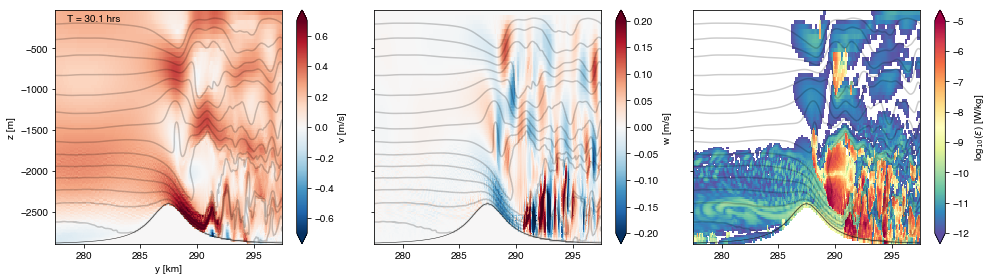

In [13]:
run = 'B6'
ti = 120
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(14,4), sharex=True, sharey=True)

# v
h = ax[0].pcolormesh(v.Yp1.values/1000, grid.Z.values, np.squeeze(v.isel(T=ti).values), cmap='RdBu_r', vmin=-0.7, vmax=0.7)
ax[0].contour(th.Y.values/1000, grid.Z.values, np.squeeze(th.isel(T=ti).values),
            levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewdiths=5)
ax[0].plot(grid.Y.isel(Y=yi[0])/1000, -grid.Depth.isel(Y=yi[0]), color='0.1', linewidth=0.5)
plt.colorbar(h, extend='both', ax=ax[0], label='v [m/s]')
timestr = 'T = {:2.1f} hrs'.format((b6['T'][ti].values)/3600)
ax[0].annotate(timestr, xy=(0.05,0.95), xycoords='axes fraction')
ax[0].set(ylabel='z [m]', xlabel='y [km]', xlim=(my-deltay, my+deltay))

# w
h = ax[1].pcolormesh(w.Y.values/1000, grid.Z.values, np.squeeze(w.isel(T=ti).values), cmap='RdBu_r', vmin=-0.2, vmax=0.2)
ax[1].contour(th.Y.values/1000, grid.Z.values, np.squeeze(th.isel(T=ti).values),
            levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewdiths=5)
ax[1].plot(grid.Y.isel(Y=yi[0])/1000, -grid.Depth.isel(Y=yi[0]), color='0.1', linewidth=0.5)
plt.colorbar(h, extend='both', ax=ax[1], label='w [m/s]')

# epsilon
tmp = np.squeeze(eps.isel(T=ti).values)
tmp2 = np.ma.masked_less(tmp,1e-12,copy=True)
h = ax[2].pcolormesh(eps.Y.values/1000, grid.Z.values, np.log10(tmp2), cmap='Spectral_r', vmin=-12, vmax=-5)
ax[2].contour(th.Y.values/1000, grid.Z.values, np.squeeze(th.isel(T=ti).values),
            levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewdiths=5)
ax[2].plot(grid.Y.isel(Y=yi[0])/1000, -grid.Depth.isel(Y=yi[0]), color='0.1', linewidth=0.5)
plt.colorbar(h, extend='both', ax=ax[2], label='log$_{10}$($\epsilon$) [W/kg]')

plt.tight_layout()
# PrintName = 'movie_{:s}/frame{:04d}.png'.format(run, ti)
PrintName = 'fig/example_non-hydrostatic.png'
plt.savefig(PrintName, dpi=200)

# Calculate wave energy flux
How do we calculate $w\prime p\prime$ from the model data?

If defined in time, a standing wave won't show up so we'll have to calculate against a stable background state. Does this mean that a standing wave simply does not have an energy flux though?

$p = phi_{hyd} \cdot \rho_0$.

Units: m$^2\,$s$^{-2} \cdot $kg$\,$m$^{-3} = $kg$\,$m$^{-1}\,$s$^{-2}$ = N$\,$m$^{-2}$ with N=kg$\,$m$\,$s$^{-2}$.

Actually, probably need to include the non-hydrostatic pressure as well:

$p = (phi_{H}+phi_{NH}) \cdot \rho_0$.

In [14]:
rho0 = 9.998000000000000e02 # from STDOUT, e.g.: grep -A 1 'rho' STDOUT.0000
gravity = 9.81
talpha = 2.0e-4

In [15]:
w = b6.WVEL
phi_hyd = b6.PHIHYD

ok, let's have a look at the uncalibrated hydrostatic pressure output. We can see the pressure drop across the ridge!

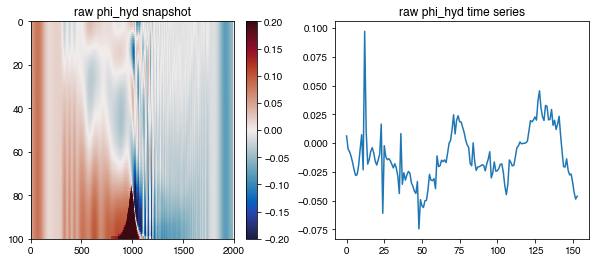

In [16]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
h = ax[0].pcolormesh(np.squeeze(phi_hyd.isel(T=100)), vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance)
plt.colorbar(h, ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('raw phi_hyd snapshot')
ax[1].plot(np.squeeze(phi_hyd.isel(Zmd000100=50, Y=1100)));
ax[1].set_title('raw phi_hyd time series');

Look at non-hydrostatic pressure

In [76]:
x1 = np.arange(0,4)
test = (x1[1:] + x1[:-1]) / 2
print(test)
print(x1.shape)
print(test.shape)

[ 0.5  1.5  2.5]
(4,)
(3,)


Bring hydrostatic and non-hydrostatic pressure to the same time steps.

In [92]:
phi_nh = b6s.phi_nh
# we need to interpolate phi_nh to phi_hyd
print(phi_nh.shape)
tmp = np.squeeze(phi_nh)
phi_nh2 = (tmp[1:,:,:].values + tmp[:-1,:,:].values) / 2
print(phi_nh2.shape)

(155, 100, 2000, 1)
(154, 100, 2000)


In [107]:
phi_hyd2 = np.squeeze(phi_hyd.values)
print(phi_hyd2.shape)

(154, 100, 2000)


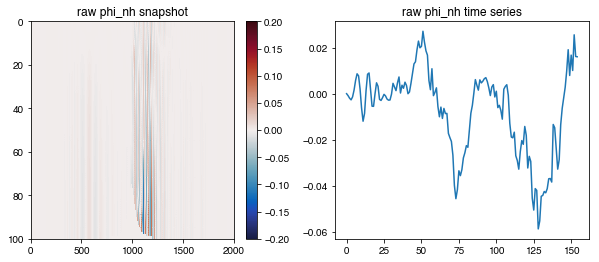

In [96]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
h = ax[0].pcolormesh(np.squeeze(phi_nh.isel(T=100)), vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance)
plt.colorbar(h, ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('raw phi_nh snapshot')
ax[1].plot(np.squeeze(phi_nh.isel(Z=50, Y=1100)));
ax[1].set_title('raw phi_nh time series');

now convert phi_hyd and phy_nh to a meaningful pressure

[...] the pressure P can be obtained as:

  `` P(i,j,k)/rhoConst = -g*rC(k) + PH(i,j,k) + PNH(i,j,k)``
  
phi_nh is on Z whereas phi_hyd is on Zmd0001000 - I'm assuming these are the same. They have the same number of depth levels. However, we had to interpolate to the same time steps, see above.

We don't really need the background pressure field ``-g*rC(k)`` when looking at pressure perturbations.

In [97]:
RC = np.tile(grid.RC,(2000,1))

In [98]:
RC.T.shape

(100, 2000)

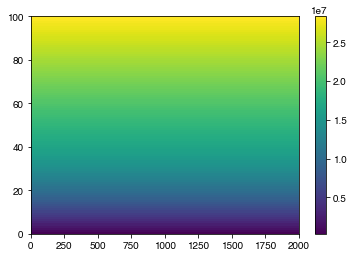

In [217]:
plt.pcolormesh(RC.T*-gravity*rho0)
plt.colorbar()

Test

In [202]:
p = np.squeeze(phi_hyd.isel(T=150).values)*rho0 + np.squeeze(phi_nh.isel(T=150).values)*rho0 -gravity*rho0*RC.T
p.shape

(100, 2000)

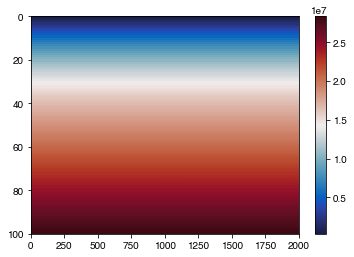

In [203]:
plt.pcolormesh(p,cmap=cmocean.cm.balance)
plt.colorbar()
plt.gca().invert_yaxis()

In [205]:
phi_nh.shape

(155, 100, 2000, 1)

In [140]:
P = phi_hyd2*rho0 + phi_nh2*rho0 -gravity*rho0*RC.T
P = P[:,:-1,:]

In [141]:
P.shape

(154, 99, 2000)

Calculate mean pressure for time steps 100-150

In [142]:
meanP = np.mean(P[99:150,:,:],axis=0)

Calculate p'

In [143]:
pp = P[99:150,:,:]-meanP

Calculate v', w'

In [152]:
V = np.squeeze(b6.VVEL.values)
V = V[:,:-1,:]
W = np.squeeze(b6.WVEL.values)
# interpolate to grid center - for w in the vertical, v in the horizontal
W = (W[:,1:,:]+W[:,:-1,:]) / 2
V = (V[:,:,1:]+V[:,:,:-1]) / 2

In [153]:
W.shape

(154, 99, 2000)

In [154]:
V.shape

(154, 99, 2000)

In [155]:
meanV = np.mean(V[99:150,:,:],axis=0)
meanW = np.mean(W[99:150,:,:],axis=0)

In [156]:
vp = V[99:150,:,:]-meanV
wp = W[99:150,:,:]-meanW

w is defined on the upper/lower grid boundaries, v at the center.

This is the w z:

``Zl       (Zl) float64 0.0 -62.96 -124.9 -185.7``

In [157]:
vppp = vp*pp
wppp = wp*pp

In [159]:
mwppp = np.mean(wppp,axis=0)

In [174]:
mwppp.shape

(99, 2000)

In [168]:
MeanVerticalEnergyFlux = np.mean(mwppp,axis=1)

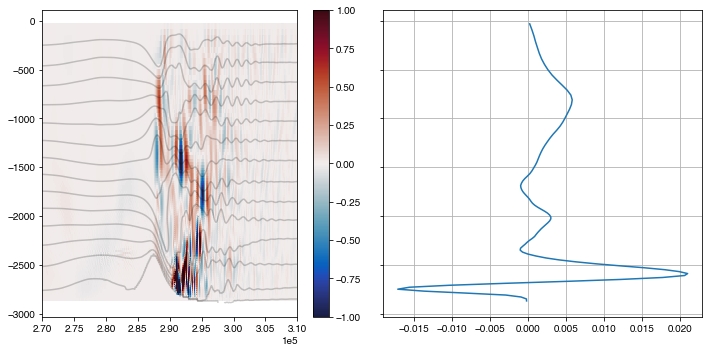

In [199]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharey=True)


# calculate mean density for overlay
th = np.squeeze(b6.THETA.values)
mth = np.mean(th[99:150,:,:],axis=0)

h = ax[0].pcolormesh(grid.Y,grid.Z[:-1],mwppp,vmin=-1,vmax=1,cmap=cmocean.cm.balance)
ax[0].contour(grid.Y,grid.Z,mth,levels=np.arange(1.6,3,0.1), colors='k', alpha=0.2, linewdiths=5)
plt.colorbar(h, ax=ax[0])
ax[0].set(xlim=(2.7e5,3.1e5))

ax[1].plot(MeanVerticalEnergyFlux,grid.Z[:-1])
ax[1].grid(True)
plt.tight_layout()
if 0:
    plt.savefig('bump_vertical_energy_flux.png',dpi=300)

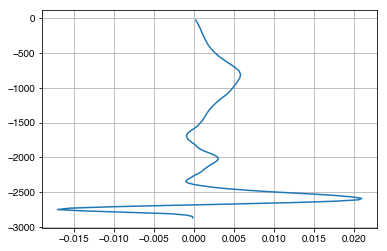

In [187]:
plt.plot(MeanVerticalEnergyFlux,grid.Z[:-1])
plt.grid(True)

In [170]:
print(np.mean(MeanVerticalEnergyFlux))

0.00213601578197


AttributeError: 'numpy.ndarray' object has no attribute 'isel'

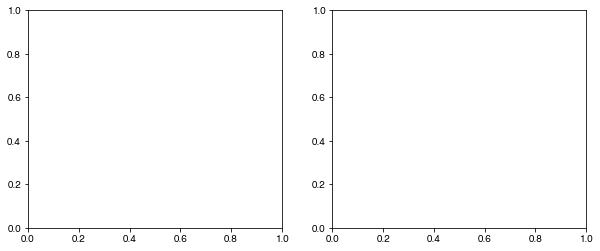

In [49]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
h = ax[0].pcolormesh(np.squeeze(p.isel(T=100)), vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance)
plt.colorbar(h, ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('raw phi_nh snapshot')
ax[1].plot(np.squeeze(phi_nh.isel(Z=50, Y=1100)));
ax[1].set_title('raw phi_nh time series');